## Charakterystka zbioru - 1.1

Zbiór przedstawia dane dotyczące laptopów, takie jak marka, typ procesora, RAM, pamięć, cena i inne.

Może służyć do analizy regresji w celu przewidywania cen laptopów na podstawie ich funkcji parametrów.

## Temat projektu i cel analizy statysycznej - 1.2
Analiza cen laptopów oraz określenie czy pamięć karty graficznej ma na nią wpływ.

## Cechy rezprezentujące analizowany problem - 1.3

* **Marka** - acer, APPLE, ASUS, Avita, DELL, HP, Lenovo, MSI
* **Producent procesora** - Intel, AMD, M1
* **Model procesora** - Core i3, Core i5, Core i7, Core i9, Celeron Dual, Pentium Quad, Ryzen 3, Ryzen 5, Ryzen 7, Ryzen 9, M1
* **Generacja procesora** - 4th, 7th, 8th, 9th, 10th, 11th, 12th, Not Available
* **Pamięć RAM** - 4GB, 8GB, 16GB, 32GB
* **Typ pamięci RAM** - DDR3, DDR4, DDR5, LPDDR3, LPDDR4, LPDDR4X
* **Pojemność dysku SSD** - 0GB, 128GB, 256GB, 512GB, 1024GB, 2048GB, 3072GB
* **Pojemność dysku HDD** - 0GB, 512GB, 1024GB, 2048GB
* **System operacyjny** - Windows, Mac, DOS
* **Architektura systemu** - 32bit, 64bit
* **Pamięć karty graficznej** - 0GB, 2GB, 4GB, 6GB, 8GB
* **Waga** - Casual, ThinNlight, Gaming
* **Gwarancja** - No warranty, 1 year, 2 years, 3 years
* **Ekran dotykowy** - True, False
* **Pakiet Microsoft Office** - True, False
* **Cena** - 16990 — 441990(Rupia indyjska) / 866.49 — 22541.49(Złoty polski)

* **Ocena** (gwiazdki) - 1 star, 2 stars, 3 stars, 4 stars, 5 stars
* **Liczba ocen** - 0 — 15.3k
* **Liczba recencji** - 0 — 1947

## Biblioteki

In [ ]:
import pandas as pd
from pandas.core.describe import DataFrameDescriber
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive
drive.mount('/content/drive')
from scipy import stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import danych - 1.4

In [ ]:
df = pd.read_csv('laptopPrice.csv')
#df

## Przygotowanie zbioru do analizy - 1.5

#### Zmiana zmiennych jakościowych na ilościowe

In [ ]:
rating_map = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5
}

# Zamień wartości ratingu na wartości numeryczne
df['rating'] = df['rating'].map(rating_map)

# Wyświetl zmienione dane
# print(df['rating'])

In [ ]:
gen_map = {
    'Not Available': 0,
    '4th': 4,
    '7th': 7,
    '8th': 8,
    '9th': 9,
    '10th': 10,
    '11th': 11,
    '12th': 12,
}

df['processor_gnrtn'] = df['processor_gnrtn'].map(gen_map)

In [ ]:
graphic_map = {
    '0 GB': 0,
    '2 GB': 2,
    '4 GB': 4,
    '6 GB': 6,
    '8 GB': 8
}

df['graphic_card_gb'] = df['graphic_card_gb'].map(graphic_map)


#### Zmiana nazw kolumn

In [ ]:
df = df.rename(columns={'rating': 'stars'})

df = df.rename(columns={'graphic_card_gb': 'Graphic Card'})

df = df.rename(columns={'processor_gnrtn': 'Processor Gen'})
# Wyświetl zmienione nazwy kolumn
# print(df.columns)

#### Zmiana waluty z Rupii indyjskich na Złote, kurs z dnia 25.05.2023r.

In [ ]:
df['Price'] = df['Price'].apply(lambda x: round(x*(0.051),2))

#### Sprawdzanie brakujacych wartości

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   Processor Gen      823 non-null    int64  
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  Graphic Card       823 non-null    int64  
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    object 
 14  msoffice           823 non-null    object 
 15  Price              823 non-null    float64
 16  stars              823 non

## Statystyki opisowe - 2.1

### Statystyki opisowe (średnia, mediana, wariancja) dla zmiennej Price

In [ ]:
df.describe()

,Processor Gen,Graphic Card,Price,stars,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,7.532199,1.190765,3914.004156,3.562576,315.301337,37.609964
std,4.695198,2.026902,2300.191299,0.567282,1047.382654,121.728017
min,0.000000,0.000000,866.490000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,2350.845000,3.000000,0.000000,0.000000
50%,10.000000,0.000000,3314.490000,4.000000,17.000000,2.000000
75%,11.000000,2.000000,4571.435000,4.000000,139.500000,18.000000
max,12.000000,8.000000,22541.490000,5.000000,15279.000000,1947.000000


#### miary położenia

In [ ]:
Price = df['Price']
mean = round(Price.mean(),2)
median = Price.median()
mode = Price.mode().iloc[0]  # Moda (uwzględniając tylko pierwszą wartość w przypadku wielu mod)
min_value = Price.min()  # Wartość minimalna
max_value = Price.max()  # Wartość maksymalna
quartiles = Price.quantile([0.25, 0.5, 0.75])  # Kwartyle
print("Średnia arytmetyczna:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Wartość minimalna:", min_value)
print("Wartość maksymalna:", max_value)
print("Kwartyle:")
print(quartiles)

Średnia arytmetyczna: 3914.0
Mediana: 3314.49
Moda: 3059.49
Wartość minimalna: 866.49
Wartość maksymalna: 22541.49
Kwartyle:
0.25    2350.845
0.50    3314.490
0.75    4571.435
Name: Price, dtype: float64


Analizując powyższe wyniki, można wywnioskować, że najczęściej spotykaną ceną jest 3059.49, a średnia arytmetyczna jest wyższa niż mediana, co może sugerować obecność nielicznych wartości odstających w górę, które zawyżają ten wynik. Ponadto, dane dotyczące kwartyli pozwalają na określenie, jak rozkład cen jest skoncentrowany wokół różnych punktów w zbiorze danych.

Kwartyle: Kwartyle dzielą dane na cztery równe części. Wartość 0.25 reprezentuje pierwszy kwartyl (25% danych jest mniejszych lub równych tej wartości), wartość 0.50 to mediana (50% danych jest mniejszych lub równych tej wartości), a wartość 0.75 to trzeci kwartyl (75% danych jest mniejszych lub równych tej wartości). W przypadku tej zmiennej, wartości kwartylne to:
    Pierwszy kwartyl (Q1): 2350.845
    Mediana (Q2): 3314.490
    Trzeci kwartyl (Q3): 4571.435

#### miary rozproszenia

In [ ]:
Price= df['Price']
mean = round(Price.mean(),2)
variance = round(Price.var(),2)
std_deviation = round(Price.std(),2)
range_value = Price.max() - Price.min()
skewness = round(skew(Price),2)
kurt = round(kurtosis(Price),2)
mean_abs_deviation = round((Price - Price.mean()).abs().mean(),2)
odchylenie_std = Price.std()
srednia_arytm = Price.mean()
klasyczny_wsp_zmien = (odchylenie_std / srednia_arytm) * 100
rozstep_kwartylowy = Price.quantile(0.75) - Price.quantile(0.25)
srednia_arytm = Price.mean()
pozycyjny_wsp_zmien = (rozstep_kwartylowy / srednia_arytm) * 100
odchylenie_cwiartkowe = (Price.quantile(0.75) - Price.median() + Price.median() - Price.quantile(0.25)) / 2
rozstep_kwartylowy = Price.quantile(0.75) - Price.quantile(0.25)
print("Klasyczne miary rozproszenia:")
print("\nOdchylenie przeciętne:",mean_abs_deviation )
print("Odchylenie standardowe:", std_deviation)
print("Klasyczny współczynnik zmienności",klasyczny_wsp_zmien)
print("Wariancja:", variance)
print("\nMiary pozycyjne")
print("\nZakres:", range_value)
print("Kurtoza:", kurt)
print("Pozycyjny współczynnik zmienności:", pozycyjny_wsp_zmien)
print("Odchylenie ćwiartkowe:", odchylenie_cwiartkowe)
print("Rozstęp kwartylowy:", rozstep_kwartylowy)

Klasyczne miary rozproszenia:

Odchylenie przeciętne: 1598.69
Odchylenie standardowe: 2300.19
Klasyczny współczynnik zmienności 58.76823855513681
Wariancja: 5290880.01

Miary pozycyjne

Zakres: 21675.0
Kurtoza: 9.21
Pozycyjny współczynnik zmienności: 56.73448243184423
Odchylenie ćwiartkowe: 1110.2949999999998
Rozstęp kwartylowy: 2220.5899999999997


Wariancja mierzy rozproszenie danych wokół średniej arytmetycznej. Wyższa wartość wariancji oznacza większe rozproszenie danych wokół średniej. W tym przypadku, wariancja jest stosunkowo duża, co sugeruje, że ceny mają duże zróżnicowanie wokół średniej arytmetycznej, natomiast ochylenie standardowe mierzy stopień rozproszenia danych wokół średniej arytmetycznej.W przypadku powyższych danych wartość odchylenia standardowego sugeruje, że ceny mają dość szerokie rozproszenie wokół średniej arytmetycznej. Odchylenie przeciętne Jest miara średniego bezwzględnego odchylenia wartości od średniej arytmetycznej. Im większa wartość odchylenia przeciętnego, tym większe jest rozproszenie danych wokół średniej. Wartość klasycznego współczynnika zmienności dla powyższych danych wynois ok. 59% i wskazuje na znaczne rozproszenie danych w stosunku do średniej arytmetycznej.
Analizując miary pozycyjna można zaobserować, że kurtoza, która jest miarą kształtu rozkładu danych wskazuje na występowanie znacznej ilości danych w ogonach rozkładu, co sugeruje obecność ekstremalnych wartości. Odchylenie ćwiartkowe wynosi 1110.29. Jest to miara rozproszenia danych między kwartylami. Im większa wartość odchylenia ćwiartkowego, tym większe jest rozproszenie danych między kwartylami.

### Statystyki opisowe dla zmiennej Graphic Card (pamięć karty graficznej)

In [ ]:
NumberOfRatings= df['Graphic Card']
mean = round(NumberOfRatings.mean(),2)
median = NumberOfRatings.median()
mode = NumberOfRatings.mode().iloc[0]  # Moda (uwzględniając tylko pierwszą wartość w przypadku wielu mod)
min_value = NumberOfRatings.min()  # Wartość minimalna
max_value = NumberOfRatings.max()  # Wartość maksymalna
quartiles = NumberOfRatings.quantile([0.25, 0.5, 0.75])  # Kwartyle
print("Średnia arytmetyczna:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Wartość minimalna:", min_value)
print("Wartość maksymalna:", max_value)
print("Kwartyle:")
print(quartiles)

Średnia arytmetyczna: 1.19
Mediana: 0.0
Moda: 0
Wartość minimalna: 0
Wartość maksymalna: 8
Kwartyle:
0.25    0.0
0.50    0.0
0.75    2.0
Name: Graphic Card, dtype: float64


In [ ]:
NumberOfRatings= df['Graphic Card']
mean = round(NumberOfRatings.mean(),2)
variance = round(NumberOfRatings.var(),2)
std_deviation = round(NumberOfRatings.std(),2)
range_value = NumberOfRatings.max() - NumberOfRatings.min()
skewness = round(skew(NumberOfRatings),2)
kurt = round(kurtosis(NumberOfRatings),2)
mean_abs_deviation = round((NumberOfRatings - NumberOfRatings.mean()).abs().mean(),2)
odchylenie_std = NumberOfRatings.std()
srednia_arytm = NumberOfRatings.mean()
klasyczny_wsp_zmien = (odchylenie_std / srednia_arytm) * 100
rozstep_kwartylowy = NumberOfRatings.quantile(0.75) - NumberOfRatings.quantile(0.25)
srednia_arytm = NumberOfRatings.mean()
pozycyjny_wsp_zmien = (rozstep_kwartylowy / srednia_arytm) * 100
odchylenie_cwiartkowe = (NumberOfRatings.quantile(0.75) - NumberOfRatings.median() + NumberOfRatings.median() - NumberOfRatings.quantile(0.25)) / 2
rozstep_kwartylowy = NumberOfRatings.quantile(0.75) - NumberOfRatings.quantile(0.25)
print("Klasyczne miary rozproszenia:")
print("\nOdchylenie przeciętne:",mean_abs_deviation )
print("Odchylenie standardowe:", std_deviation)
print("Klasyczny współczynnik zmienności",klasyczny_wsp_zmien)
print("Wariancja:", variance)
print("\nMiary pozycyjne")
print("\nZakres:", range_value)
print("Kurtoza:", kurt)
print("Pozycyjny współczynnik zmienności:", pozycyjny_wsp_zmien)
print("Odchylenie ćwiartkowe:", odchylenie_cwiartkowe)
print("Rozstęp kwartylowy:", rozstep_kwartylowy)


Klasyczne miary rozproszenia:

Odchylenie przeciętne: 1.67
Odchylenie standardowe: 2.03
Klasyczny współczynnik zmienności 170.21843153154006
Wariancja: 4.11

Miary pozycyjne

Zakres: 8
Kurtoza: 1.26
Pozycyjny współczynnik zmienności: 167.95918367346937
Odchylenie ćwiartkowe: 1.0
Rozstęp kwartylowy: 2.0


### Statystyki opisowe dla zmiennej Number of Ratings

In [ ]:
NumberOfRatings= df['Number of Ratings']
mean = round(NumberOfRatings.mean(),2)
median = NumberOfRatings.median()
mode = NumberOfRatings.mode().iloc[0]  # Moda (uwzględniając tylko pierwszą wartość w przypadku wielu mod)
min_value = NumberOfRatings.min()  # Wartość minimalna
max_value = NumberOfRatings.max()  # Wartość maksymalna
quartiles = NumberOfRatings.quantile([0.25, 0.5, 0.75])  # Kwartyle
print("Średnia arytmetyczna:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Wartość minimalna:", min_value)
print("Wartość maksymalna:", max_value)
print("Kwartyle:")
print(quartiles)

Średnia arytmetyczna: 315.3
Mediana: 17.0
Moda: 0
Wartość minimalna: 0
Wartość maksymalna: 15279
Kwartyle:
0.25      0.0
0.50     17.0
0.75    139.5
Name: Number of Ratings, dtype: float64


In [ ]:
NumberOfRatings= df['Number of Ratings']
mean = round(NumberOfRatings.mean(),2)
variance = round(NumberOfRatings.var(),2)
std_deviation = round(NumberOfRatings.std(),2)
range_value = NumberOfRatings.max() - NumberOfRatings.min()
skewness = round(skew(NumberOfRatings),2)
kurt = round(kurtosis(NumberOfRatings),2)
mean_abs_deviation = round((NumberOfRatings - NumberOfRatings.mean()).abs().mean(),2)
odchylenie_std = NumberOfRatings.std()
srednia_arytm = NumberOfRatings.mean()
klasyczny_wsp_zmien = (odchylenie_std / srednia_arytm) * 100
rozstep_kwartylowy = NumberOfRatings.quantile(0.75) - NumberOfRatings.quantile(0.25)
srednia_arytm = NumberOfRatings.mean()
pozycyjny_wsp_zmien = (rozstep_kwartylowy / srednia_arytm) * 100
odchylenie_cwiartkowe = (NumberOfRatings.quantile(0.75) - NumberOfRatings.median() + NumberOfRatings.median() - NumberOfRatings.quantile(0.25)) / 2
rozstep_kwartylowy = NumberOfRatings.quantile(0.75) - NumberOfRatings.quantile(0.25)
print("Klasyczne miary rozproszenia:")
print("\nOdchylenie przeciętne:",mean_abs_deviation )
print("Odchylenie standardowe:", std_deviation)
print("Klasyczny współczynnik zmienności",klasyczny_wsp_zmien)
print("Wariancja:", variance)
print("\nMiary pozycyjne")
print("\nZakres:", range_value)
print("Kurtoza:", kurt)
print("Pozycyjny współczynnik zmienności:", pozycyjny_wsp_zmien)
print("Odchylenie ćwiartkowe:", odchylenie_cwiartkowe)
print("Rozstęp kwartylowy:", rozstep_kwartylowy)


Klasyczne miary rozproszenia:

Odchylenie przeciętne: 458.22
Odchylenie standardowe: 1047.38
Klasyczny współczynnik zmienności 332.1846541660854
Wariancja: 1097010.42

Miary pozycyjne

Zakres: 15279
Kurtoza: 73.67
Pozycyjny współczynnik zmienności: 44.243389995105844
Odchylenie ćwiartkowe: 69.75
Rozstęp kwartylowy: 139.5


## Histogram i wykres ramka-wąsy dla zmiennej Price - 2.2

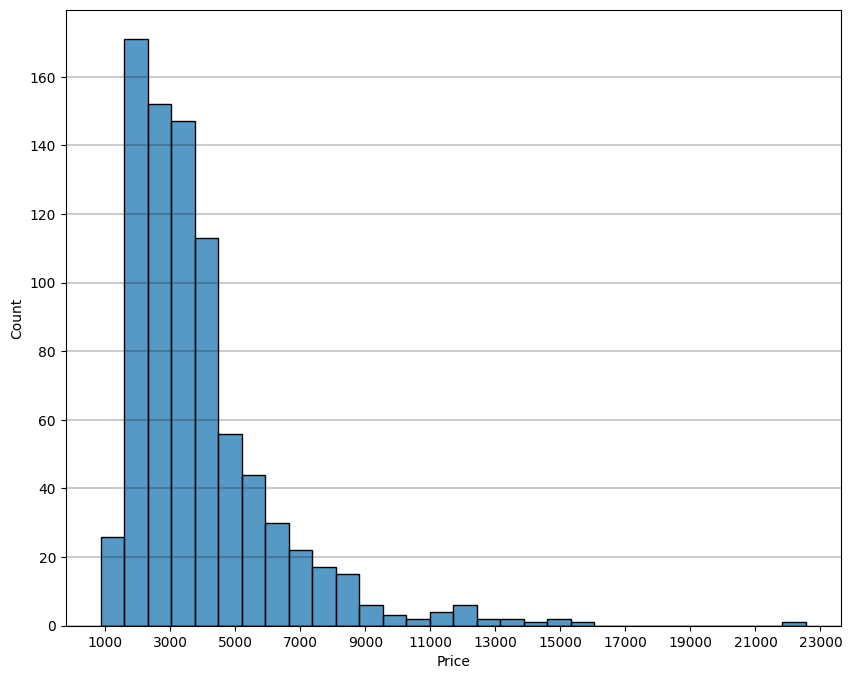

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(df['Price'], bins = 30)
ax.set_xticks(np.arange((round(df['Price'].min()//1000,0)+1)*1000, (round(df['Price'].max()//1000,0)+2)*1000, 2000))
for ytick in range(len(ax.get_yticks())-1):
  plt.axhline(y=ax.get_yticks()[ytick].item(), color='k', linestyle='-', alpha=0.2)
plt.show()

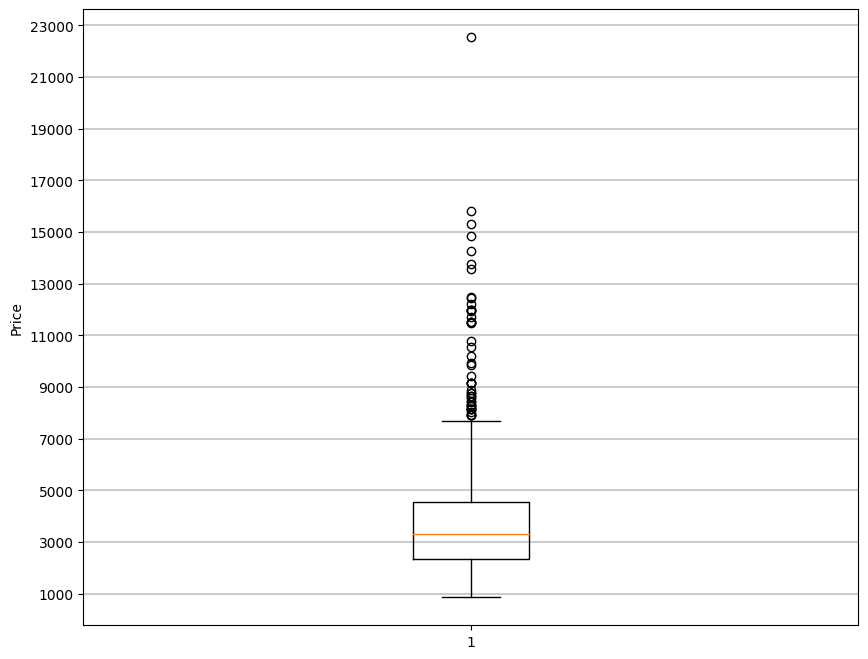

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(df['Price'].dropna())
ax.set_yticks(np.arange((round(df['Price'].min()//1000,0)+1)*1000, (round(df['Price'].max()//1000,0)+2)*1000, 2000))
for ytick in ax.get_yticks():
  plt.axhline(y=ytick, color='k', linestyle='-', alpha=0.2)
ax.set_ylabel('Price')
plt.show()

Pułap cenowy większości laptopów to wartości od ok. 900 - 7 700. Mediana cenowa zaznaczona na wykresie pomarańczową kreską wskazuje wartość ok 3 300. Można zaobserwować również wartości odstające, gdzie największa z nich sięga ponad 22 500.

## Skategoryzowany histogram i wykres ramka-wąsy dla zmiennej Price kategoryzowany po zmiennej Graphic Card - 2.3

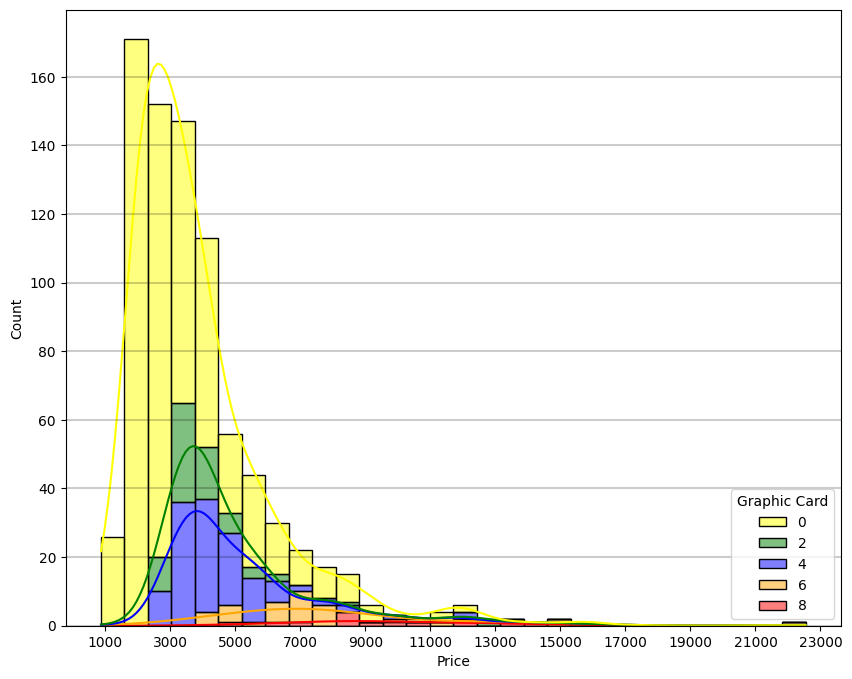

In [ ]:
plt.figure(figsize=(10, 8))
my_palette = ['yellow', 'green', 'blue', 'orange', 'red']
ax = sns.histplot(data=df, x='Price', bins=30, kde=True, palette=my_palette, hue='Graphic Card', multiple='stack')
ax.set_xticks(np.arange((round(df['Price'].min()//1000,0)+1)*1000, (round(df['Price'].max()//1000,0)+2)*1000, 2000))
for ytick in range(len(ax.get_yticks())-1):
  plt.axhline(y=ax.get_yticks()[ytick].item(), color='k', linestyle='-', alpha=0.2)
plt.show()

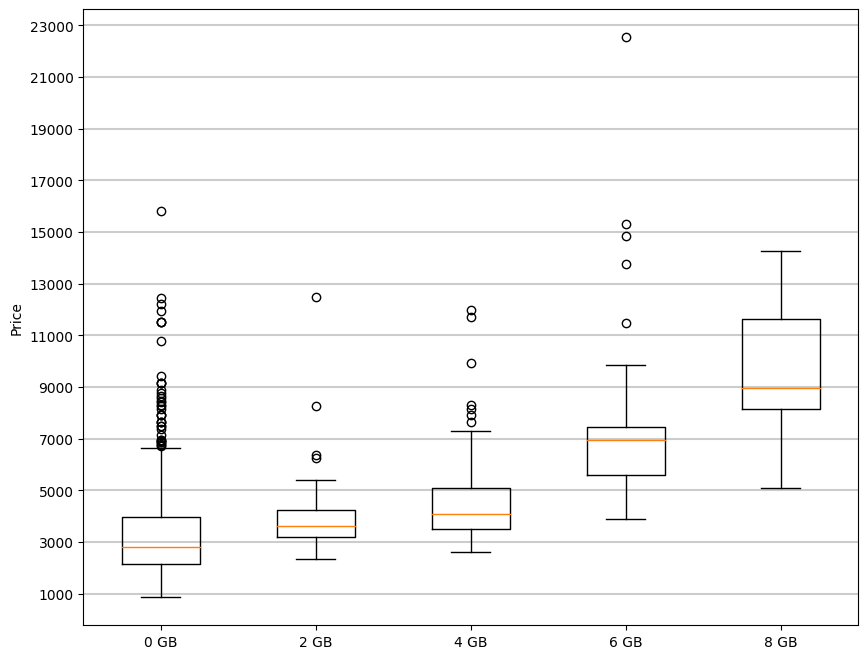

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot([df.loc[df['Graphic Card']==0, 'Price'].dropna(),
           df.loc[df['Graphic Card']==2, 'Price'].dropna(),
          df.loc[df['Graphic Card']==4, 'Price'].dropna(),
          df.loc[df['Graphic Card']==6, 'Price'].dropna(),
          df.loc[df['Graphic Card']==8, 'Price'].dropna()])

ax.set_ylabel('Price')
plt.xticks([1,2,3,4,5],["0 GB","2 GB","4 GB","6 GB","8 GB"])
ax.set_yticks(np.arange((round(df['Price'].min()//1000,0)+1)*1000, (round(df['Price'].max()//1000,0)+2)*1000, 2000))
for ytick in ax.get_yticks():
  if ytick >=0:
    plt.axhline(y=ytick, color='k', linestyle='-', alpha=0.2)
plt.show()

Z powyższego wykresu można wywnioskować że cena laptopów rośnie proporcjonalnie do ilości pamięci (GB) graficznej karty. Największy rozrzut cenowy występuje dla 8 GB. Najwyższą  wartość odstającą można zanotować dla 6 GB. Najwięcej wartości odstających występuje dla 0 GB, co może być spowodowane różnicami w zintegrowanej karcie graficznej, któa występuje w takich modelach.

## Zgodność empirycznego rozkładu z rozkładem normalnym - 3.1

In [ ]:
from scipy.stats import shapiro
data = np.concatenate([
    df.loc[df['Graphic Card']==0, 'Price'].dropna(),
    df.loc[df['Graphic Card']==2, 'Price'].dropna(),
    df.loc[df['Graphic Card']==4, 'Price'].dropna(),
    df.loc[df['Graphic Card']==6, 'Price'].dropna(),
    df.loc[df['Graphic Card']==8, 'Price'].dropna(),
])
stat, p = shapiro(data)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Rozkład jest zbliżony do normalnego')
else:
    print('Rozkład nie jest zbliżony do normalnego')

stat=0.799, p=0.799
Rozkład nie jest zbliżony do normalnego


## Badanie związku korelacyjnego między badanymi zmiennymi - 3.2

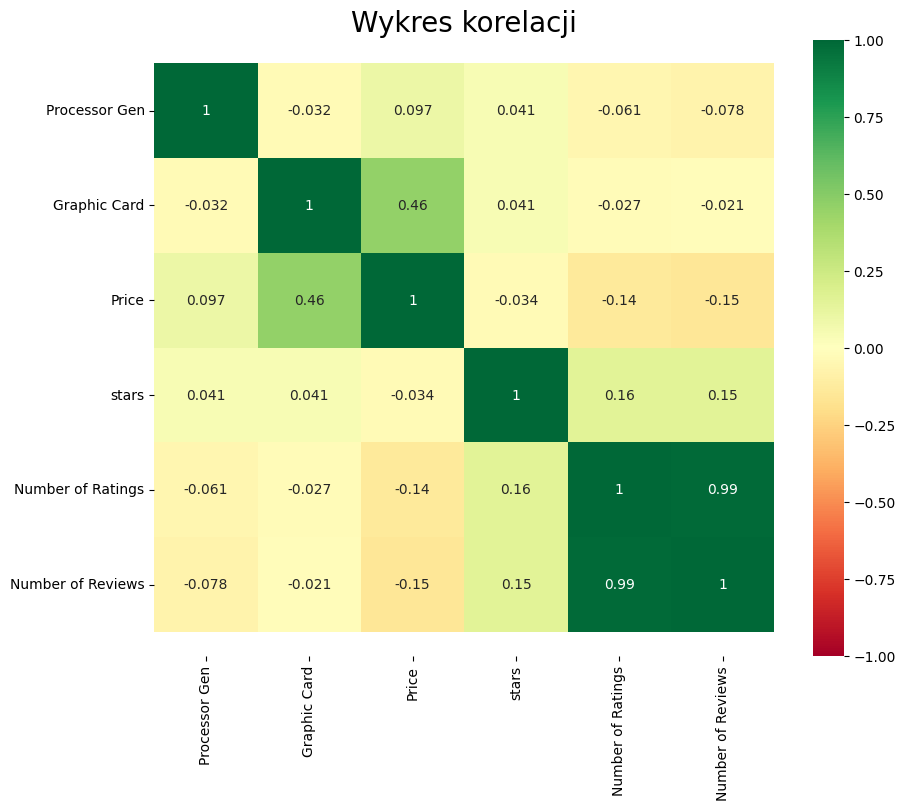

In [ ]:
plt.figure(figsize=(10, 8))

# wizualizacja Heatmapy korelacji
ax = sns.heatmap(df.corr(numeric_only = True),
                 xticklabels=df.corr(numeric_only = True).columns,
                 yticklabels=df.corr(numeric_only = True).columns,
                 cmap='RdYlGn',
                 vmin=-1, vmax=1,
                 annot=True, center=0)

# dekoracja wykresu
plt.title('Wykres korelacji', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25) # odsunięcie etykiet od wykresu

# Zmiana wymiaru etykiet
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Można zaobesrwować regresję liniową. Na podstawie analizy korelacji można stwierdzić, że nie ma silnej zależności między ceną a ilością gwiazdek, liczbą ocen, liczbą recenzji oraz generacją procesora. Istnieje natomiast dodatnia zależność między pamięcią karty graficznej a ceną.

## Zbiór treningowy i tesotwy - 3.3

In [ ]:
X = df[['Graphic Card','Processor Gen']]
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#X.shape
#y.shape

In [ ]:
for subset in [X, y, X_train, y_train, X_test, y_test]:
    print(subset.shape)

(823, 2)
(823, 1)
(658, 2)
(658, 1)
(165, 2)
(165, 1)


In [ ]:
165/823

0.20048602673147023

## Model regresji liniowej prostej - 3.4

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# model.coef_
# model.intercept_

## Prognoza z wykorzystaniem modelu oraz ocena jakości modelu - 3.5

Prognoza z wykorzystaniem modelu

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.23461706709201957,     R2_test = 0.17819584840298053,
MAE_train = 1370.4582478897896,    MAE_test = 1448.2917377234141,
MSE_train = 4085556.391518414,    MSE_test = 4165599.34206298,
RMSE_train = 2021.2759315636285,    RMSE_test = 2040.9799955077904 


Model regresji posiada wartość wskaźnika R2 bliżej wartości 0 niż jeden, co wskazuje na niedouczenie

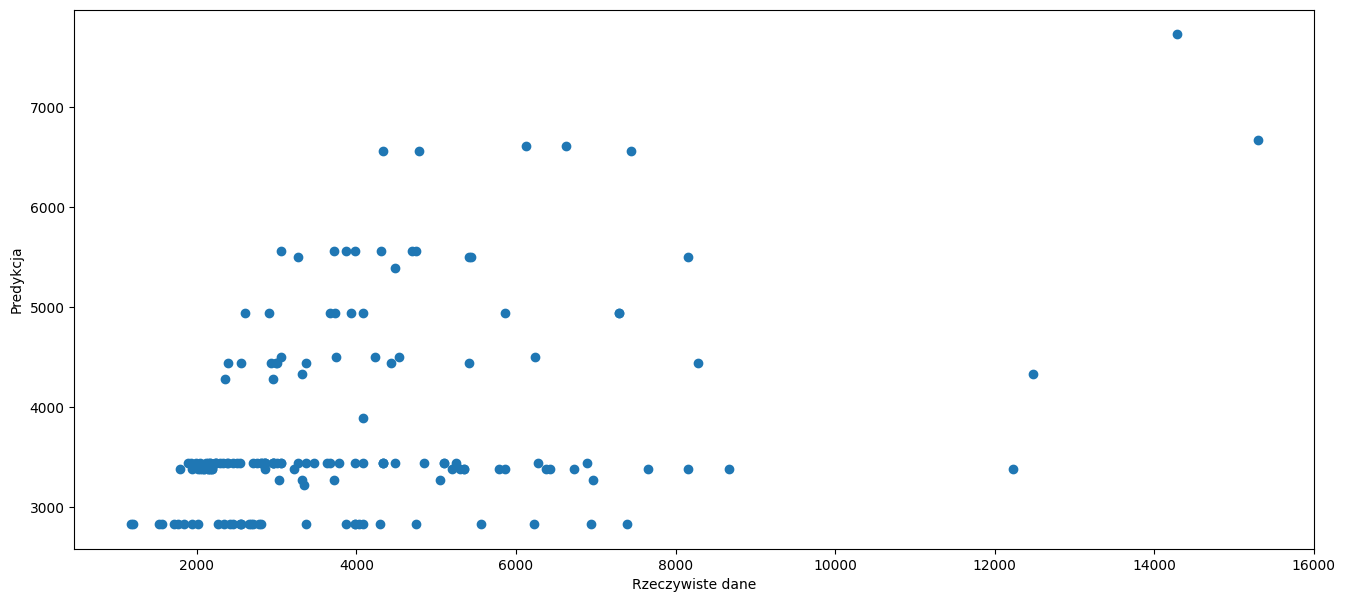

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

In [ ]:
X = df[['Graphic Card','Processor Gen']]  # Zmienne niezależne
y = df['Price']  # Zmienna zależna

# Zbuduj model regresji liniowej
model = LinearRegression()
model.fit(X, y)
wspolczynniki = model.coef_
wyraz_wolny = model.intercept_
print("Współczynniki: ", wspolczynniki)
print("Wyraz wolny: ", wyraz_wolny)
equation = "y = "
for i, coef in enumerate(wspolczynniki):
    equation += f"({coef:.2f} * x{i+1}) + "
equation += f"{wyraz_wolny:.2f}"
print("Równanie modelu: ", equation)

Współczynniki:  [526.08416449  54.74074697]
Wyraz wolny:  2875.243072125909
Równanie modelu:  y = (526.08 * x1) + (54.74 * x2) + 2875.24


Model jest liniowym modelem regresji z dwoma niezależnymi zmiennymi.

Na podstawie powyższych wyników można określić że w pewnym stopniu cena laptopa jest uzależniona od ceny karty graficznej, jednak trudno to poprzeć zbudowanym modelem prez jego słaby poziom wyuczenia. Cel analizy został spełniony.